 ## In this notebook, we'll explore a machine learning classification example focused on predicting depression in students using popular classifiers.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

## We will be working with a dataset containing information relevant to student mental health. This includes features that can be used to predict the likelihood of depression in students.


In [4]:
data_file = r"/content/Student Mental health.csv"
data = pd.read_csv(data_file)
data.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


# Visualizing Marital Status Distribution

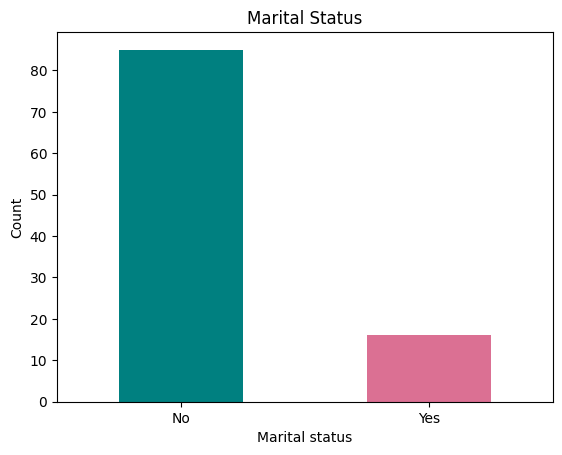

In [5]:
ax = data['Marital status'].value_counts()
ax.plot(kind='bar', color=['teal','palevioletred'])
plt.ylabel('Count')
plt.xlabel('Marital status')
plt.xticks(rotation=0)
plt.title('Marital Status')
plt.show()

# Checking the Balance of Depression Labels

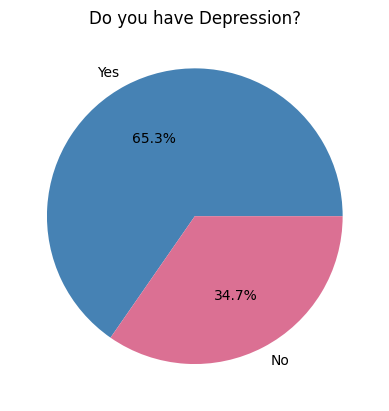

In [6]:
#to check if the label is balance or not
fig, mentalStatus = plt.subplots()
x=data['Do you have Depression?'].value_counts()
labels=data['Do you have Depression?'].unique()
mentalStatus.pie(x=x, labels=labels, autopct='%1.1f%%', colors=['steelblue','palevioletred'])
plt.title('Do you have Depression?')
plt.show()

# Visualizing the Distribution of Anxiety Labels

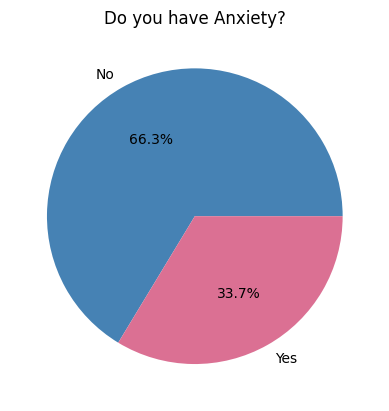

In [7]:
# Visualizing the Distribution of Anxiety Labels
fig, mentalStatus = plt.subplots()
x=data['Do you have Anxiety?'].value_counts()
labels=data['Do you have Anxiety?'].unique()
mentalStatus.pie(x=x, labels=labels, autopct='%1.1f%%', colors=['steelblue','palevioletred'])
plt.title('Do you have Anxiety?')
plt.show()

# Visualizing the Distribution of Panic attack Labels

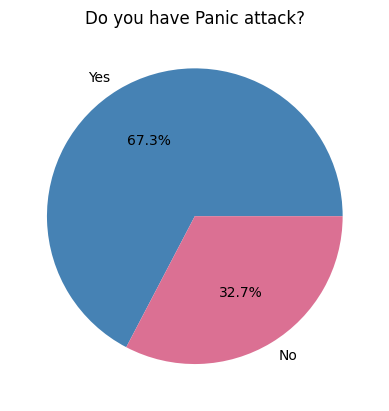

In [8]:
# Visualizing the Distribution of Panic attack Labels
fig, mentalStatus = plt.subplots()
x=data['Do you have Panic attack?'].value_counts()
labels=data['Do you have Panic attack?'].unique()
mentalStatus.pie(x=x, labels=labels, autopct='%1.1f%%', colors=['steelblue','palevioletred'])
plt.title('Do you have Panic attack?')
plt.show()

# Seeking Specialist Treatment: Distribution of Responses

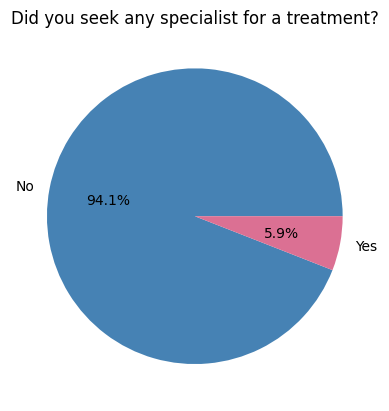

In [9]:
# Seeking Specialist Treatment: Distribution of Responses
fig, mentalStatus = plt.subplots()
x=data['Did you seek any specialist for a treatment?'].value_counts()
labels=data['Did you seek any specialist for a treatment?'].unique()
mentalStatus.pie(x=x, labels=labels, autopct='%1.1f%%', colors=['steelblue','palevioletred'])
plt.title('Did you seek any specialist for a treatment?')
plt.show()

## Data Preprocessing and Conversion Functions

In [10]:
# Function to convert interval of "What is your CGPA?" to midpoint integer
def interval_to_int(interval):
    lower, upper = interval.split('-')
    midpoint = (float(lower) + float(upper)) / 2
    return midpoint

# Function to convert "Your current year of Study" to integer
def string_to_int(interval):
    name, number = interval.split(' ')
    year = int(number)
    return year

# drop date column
data.drop(['Timestamp'], axis=1, inplace = True)

# decode Nominal Values into Numeric Values
data['Choose your gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
data['Marital status'].replace(['No', 'Yes'], [0, 1], inplace=True)
data['Do you have Depression?'].replace(['No', 'Yes'], [0, 1], inplace=True)
data['Do you have Anxiety?'].replace(['No', 'Yes'], [0, 1], inplace=True)
data['Do you have Panic attack?'].replace(['No', 'Yes'], [0, 1], inplace=True)
data['Did you seek any specialist for a treatment?'].replace(['No', 'Yes'], [0, 1], inplace=True)


# Apply the function to convert interval of CGPA to an integer
data['What is your CGPA?'] = data['What is your CGPA?'].apply(interval_to_int)


# Apply the function to convert the Year to an integer
data['Your current year of Study'] = data['Your current year of Study'].apply(string_to_int)

# Convert "What is your course?" attribute into lower letter string
data['What is your course?'] = data['What is your course?'].str.lower()


## Unique Courses in the Dataset

In [11]:
data['What is your course?'].unique()

array(['engineering', 'islamic education', 'bit', 'laws', 'mathemathics',
       'pendidikan islam', 'bcs', 'human resources', 'irkhs',
       'psychology', 'kenms', 'accounting ', 'enm', 'marine science',
       'koe', 'banking studies', 'business administration', 'law',
       'kirkhs', 'usuluddin ', 'taasl', 'engine', 'ala',
       'biomedical science', 'benl', 'it', 'cts', 'engin', 'econs',
       'mhsc', 'malcom', 'kop', 'human sciences ', 'biotechnology',
       'communication ', 'diploma nursing', 'pendidikan islam ',
       'radiography', 'fiqh fatwa ', 'diploma tesl', 'fiqh', 'nursing '],
      dtype=object)

## Course Mapping and Numeric Conversion

In [12]:
data['What is your course?'].replace({
    'engineering':0, 'islamic education':1, 'bit':2, 'laws':3, 'mathemathics':4,
       'pendidikan islam':5, 'bcs':6, 'human resources':7, 'irkhs':8,
       'psychology':9, 'kenms':10, 'accounting ':11, 'enm':12, 'marine science':13,
       'koe':14, 'banking studies':15, 'business administration':16, 'law':17,
       'kirkhs':18, 'usuluddin ':19, 'taasl':20, 'engine':21, 'ala':22,
       'biomedical science':23, 'benl':24, 'it':25, 'cts':26, 'engin':27, 'econs':28,
       'mhsc':29, 'malcom':30, 'kop':31, 'human sciences ':32, 'biotechnology':33,
       'communication ':34, 'diploma nursing':35, 'pendidikan islam ':36,
       'radiography':37, 'fiqh fatwa ':38, 'diploma tesl':39, 'fiqh':40, 'nursing ':41
}, inplace=True) #just decode (replace) Nominal Values into Numeric Values in "What is your course?" attribute

data.head(10)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,1,18.0,0,1,3.245,0,1,0,1,0
1,0,21.0,1,2,3.245,0,0,1,0,0
2,0,19.0,2,1,3.245,0,1,1,1,0
3,1,22.0,3,3,3.245,1,1,0,0,0
4,0,23.0,4,4,3.245,0,0,0,0,0
5,0,19.0,0,2,3.750,0,0,0,1,0
6,1,23.0,5,2,3.750,1,1,0,1,0
7,1,18.0,6,1,3.750,0,0,1,0,0
8,1,19.0,7,2,2.745,0,0,0,0,0
9,0,18.0,8,1,3.750,0,0,1,1,0



## Unique Numeric Values for Courses

In [13]:
data['What is your course?'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])


## Distribution of CGPA

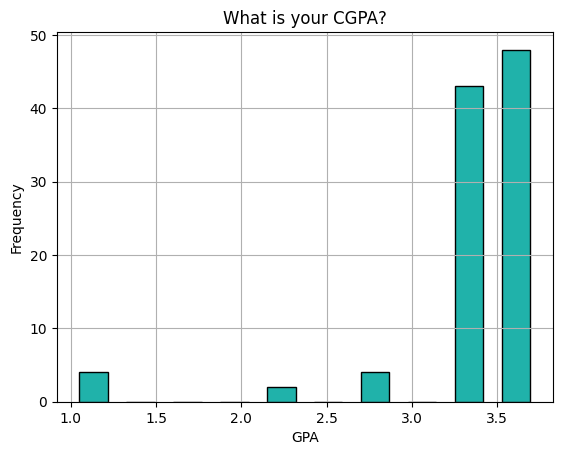

In [14]:
GPA = data['What is your CGPA?']

plt.hist(GPA , edgecolor='black', color = "lightseagreen",rwidth=0.6)
plt.title("What is your CGPA?")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.grid('both')
plt.xticks(rotation=0)
plt.show()


## Dataset Summary Statistics

In [15]:
data.describe()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
count,101.000000,100.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.742574,20.53000,12.217822,1.970297,3.356287,0.158416,0.346535,0.336634,0.326733,0.059406
std,0.439397,2.49628,11.863055,0.994540,0.585152,0.366952,0.478239,0.474915,0.471358,0.237562
min,0.000000,18.00000,0.000000,1.000000,0.995000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.00000,2.000000,1.000000,3.245000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,19.00000,6.000000,2.000000,3.245000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,23.00000,21.000000,3.000000,3.750000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,24.00000,41.000000,4.000000,3.750000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dataset Information

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Choose your gender                            101 non-null    int64  
 1   Age                                           100 non-null    float64
 2   What is your course?                          101 non-null    int64  
 3   Your current year of Study                    101 non-null    int64  
 4   What is your CGPA?                            101 non-null    float64
 5   Marital status                                101 non-null    int64  
 6   Do you have Depression?                       101 non-null    int64  
 7   Do you have Anxiety?                          101 non-null    int64  
 8   Do you have Panic attack?                     101 non-null    int64  
 9   Did you seek any specialist for a treatment?  101 non-null    int

## Handling Missing Values in the Dataset


In [17]:
data.replace(' ', np.nan, inplace=True)
data.fillna({"Age":data['Age'].mean()}, inplace=True)

## Missing Values Summary


In [18]:
missing_values = data.isnull()
missing_count = missing_values.sum()
s=data.isnull().sum()
print(s.to_string())

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0


## Pearson Correlation Matrix

In [19]:
datacorr = data.corr(method = 'pearson', numeric_only=True)
datacorr

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
Choose your gender,1.000000,0.002291,0.173932,0.073861,0.149679,0.069389,0.143235,-0.059783,0.023902,0.052168
Age,0.002291,1.000000,0.067551,0.243138,0.005128,0.104452,-0.071980,-0.093423,0.055606,0.047793
What is your course?,0.173932,0.067551,1.000000,0.131081,-0.138415,0.003480,-0.071604,-0.197740,0.085504,-0.100443
Your current year of Study,0.073861,0.243138,0.131081,1.000000,0.014071,0.232232,-0.020192,-0.020962,-0.021754,-0.077108
What is your CGPA?,0.149679,0.005128,-0.138415,0.014071,1.000000,0.035134,0.041807,0.172950,0.042511,0.025342
Marital status,0.069389,0.104452,0.003480,0.232232,0.035134,1.000000,0.595784,0.092606,0.275909,0.349819
Do you have Depression?,0.143235,-0.071980,-0.071604,-0.020192,0.041807,0.595784,1.000000,0.273764,0.246842,0.345105
Do you have Anxiety?,-0.059783,-0.093423,-0.197740,-0.020962,0.172950,0.092606,0.273764,1.000000,0.084478,0.086880
Do you have Panic attack?,0.023902,0.055606,0.085504,-0.021754,0.042511,0.275909,0.246842,0.084478,1.000000,0.182145
Did you seek any specialist for a treatment?,0.052168,0.047793,-0.100443,-0.077108,0.025342,0.349819,0.345105,0.086880,0.182145,1.000000


## Visualization of Pearson Correlation Matrix

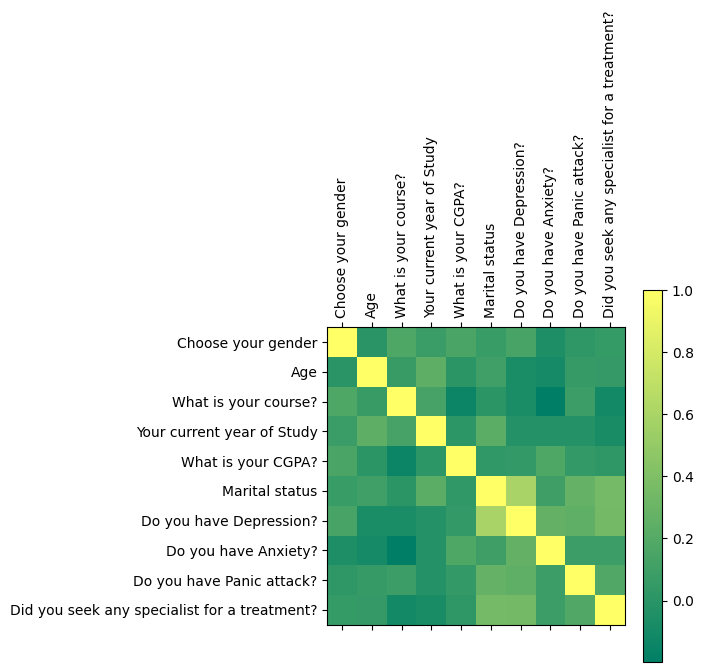

In [20]:
%matplotlib inline
plt.matshow(datacorr, cmap="summer")
plt.colorbar()

plt.xticks(list(range(len(data.columns))), data.columns, rotation='vertical')
plt.yticks(list(range(len(data.columns))), data.columns, rotation='horizontal')

plt.show()

## Removing Noise Columns (attributes)

In [21]:
data.drop(['Choose your gender', 'Age', 'What is your course?', 'Your current year of Study', 'What is your CGPA?'], axis=1, inplace = True)
data.head()

,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,1,0,1,0
1,0,0,1,0,0
2,0,1,1,1,0
3,1,1,0,0,0
4,0,0,0,0,0


## Data Splitting for Depression Prediction

In [22]:
X = data.drop('Do you have Depression?', axis=1)  # Features (all columns except the target column)
y = data['Do you have Depression?']                # Target variable

# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(X, y, test_size=0.2,train_size=0.8,random_state=0)

print("Train data  : {}".format(trainData.shape))
print("Test data   : {}".format(testData.shape))
print("Train labels: {}".format(trainLabels.shape))
print("Test labels : {}".format(testLabels.shape))

Train data  : (80, 4)
Test data   : (21, 4)
Train labels: (80,)
Test labels : (21,)



## Evaluate the performance of the models and visualize results

## Decision Tree Model Evaluation

DT Acccuracy =  0.8571
DT precision =  0.8000
DT recal =  0.6667
DT f1 =  0.7273

DT True Positive Rate (TPR) =  0.6667
DT False Positive Rate (FPR) =  0.0667
DT False Negative Rate (FNR) =  0.3333
DT True Negative Rate (TNR) =  0.9333



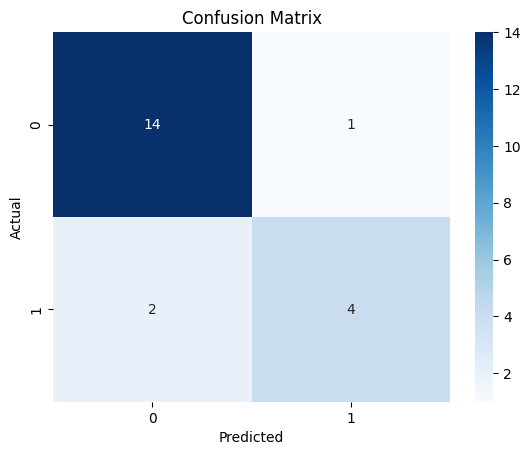

In [23]:
# Apply Decision Tree

# Train the Decision Tree model
DTmodel = DecisionTreeClassifier()
DTmodel.fit(trainData, trainLabels)

# Make predictions on the test set
y_predDT = DTmodel.predict(testData)


#Calculate the accuracy, precision, and recall of the DT classifier
accuracyDT = accuracy_score(testLabels, y_predDT)
precisionDT = precision_score(testLabels, y_predDT)
recallDT = recall_score(testLabels, y_predDT)
f1DT = f1_score(testLabels, y_predDT)

confusion_matDT = confusion_matrix(testLabels, y_predDT)
TNDT, FPDT, FNDT, TPDT = confusion_matDT.ravel()
FPRDT = FPDT / (FPDT + TNDT)
FNRDT = FNDT / (FNDT + TPDT)
TPRDT = TPDT / (TPDT + FNDT)
TNRDT = TNDT / (TNDT + FPDT)

aucDT = roc_auc_score(testLabels, y_predDT)
FPRRDT = [0, FPRDT, 1]
TPRRDT = [0, TPRDT, 1]

# Print the results of the accuracy, precision, recall, and F1 of the DT classifier
print(f"DT Acccuracy = {accuracyDT: .4f}")
print(f"DT precision = {precisionDT: .4f}")
print(f"DT recal = {recallDT: .4f}")
print(f"DT f1 = {f1DT: .4f}")
print()
print(f"DT True Positive Rate (TPR) = {TPRDT: .4f}")
print(f"DT False Positive Rate (FPR) = {FPRDT: .4f}")
print(f"DT False Negative Rate (FNR) = {FNRDT: .4f}")
print(f"DT True Negative Rate (TNR) = {TNRDT: .4f}")
print()


# Plot the confusion matrix as a heatmap for DT
sns.heatmap(confusion_matDT, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine (SVM) Model Evaluation

SVM Acccuracy =  0.9048
SVM precision =  0.8333
SVM recal =  0.8333
SVM f1 =  0.8333

SVM True Positive Rate (TPR) =  0.8333
SVM False Positive Rate (FPR) =  0.0667
SVM False Negative Rate (FNR) =  0.1667
SVM True Negative Rate (TNR) =  0.9333



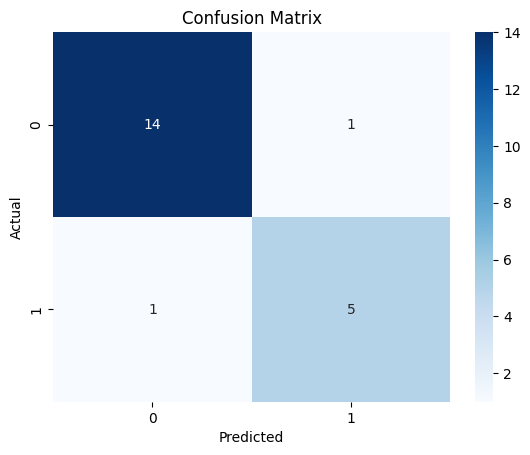

In [24]:
# Apply SVM

# Train the SVM model
SVMmodel = SVC()
SVMmodel.fit(trainData, trainLabels)

# Make predictions on the test set
y_predSVM = SVMmodel.predict(testData)


#Calculate the accuracy, precision, and recall of the SVM classifier
accuracySVM = accuracy_score(testLabels, y_predSVM)
precisionSVM = precision_score(testLabels, y_predSVM)
recallSVM = recall_score(testLabels, y_predSVM)
f1SVM = f1_score(testLabels, y_predSVM)

confusion_matSVM = confusion_matrix(testLabels, y_predSVM)
TNSVM, FPSVM, FNSVM, TPSVM = confusion_matSVM.ravel()
FPRSVM = FPSVM / (FPSVM + TNSVM)
FNRSVM = FNSVM / (FNSVM + TPSVM)
TPRSVM = TPSVM / (TPSVM + FNSVM)
TNRSVM = TNSVM / (TNSVM + FPSVM)

aucSVM = roc_auc_score(testLabels, y_predSVM)
FPRRSVM = [0, FPRSVM, 1]
TPRRSVM = [0, TPRSVM, 1]

# Print the results of the accuracy, precision, recall, and F1 of the SVM classifier
print(f"SVM Acccuracy = {accuracySVM: .4f}")
print(f"SVM precision = {precisionSVM: .4f}")
print(f"SVM recal = {recallSVM: .4f}")
print(f"SVM f1 = {f1SVM: .4f}")
print()
print(f"SVM True Positive Rate (TPR) = {TPRSVM: .4f}")
print(f"SVM False Positive Rate (FPR) = {FPRSVM: .4f}")
print(f"SVM False Negative Rate (FNR) = {FNRSVM: .4f}")
print(f"SVM True Negative Rate (TNR) = {TNRSVM: .4f}")
print()

# Plot the confusion matrix as a heatmap for SVM
sns.heatmap(confusion_matSVM, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes Model Evaluation

NB Acccuracy =  0.8571
NB precision =  1.0000
NB recal =  0.5000
NB f1 =  0.6667

NB True Positive Rate (TPR) =  0.5000
NB False Positive Rate (FPR) =  0.0000
NB False Negative Rate (FNR) =  0.5000
NB True Negative Rate (TNR) =  1.0000



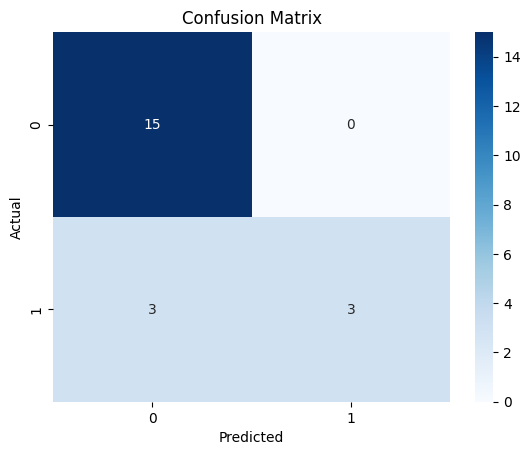

In [25]:
# Train the NB model
NBmodel = GaussianNB()
NBmodel.fit(trainData, trainLabels)

# Make predictions on the test set
y_predNB = NBmodel.predict(testData)


#Calculate the accuracy, precision, and recall of the NB classifier
accuracyNB = accuracy_score(testLabels, y_predNB)
precisionNB = precision_score(testLabels, y_predNB)
recallNB = recall_score(testLabels, y_predNB)
f1NB = f1_score(testLabels, y_predNB)

confusion_matNB = confusion_matrix(testLabels, y_predNB)
TNNB, FPNB, FNNB, TPNB = confusion_matNB.ravel()
FPRNB = FPNB / (FPNB + TNNB)
FNRNB = FNNB / (FNNB + TPNB)
TPRNB = TPNB / (TPNB + FNNB)
TNRNB = TNNB / (TNNB + FPNB)

aucNB = roc_auc_score(testLabels, y_predNB)
FPRRNB = [0, FPRNB, 1]
TPRRNB = [0, TPRNB, 1]

# Print the results of the accuracy, precision, recall, and F1 of the NB classifier
print(f"NB Acccuracy = {accuracyNB: .4f}")
print(f"NB precision = {precisionNB: .4f}")
print(f"NB recal = {recallNB: .4f}")
print(f"NB f1 = {f1NB: .4f}")
print()
print(f"NB True Positive Rate (TPR) = {TPRNB: .4f}")
print(f"NB False Positive Rate (FPR) = {FPRNB: .4f}")
print(f"NB False Negative Rate (FNR) = {FNRNB: .4f}")
print(f"NB True Negative Rate (TNR) = {TNRNB: .4f}")
print()

# Plot the confusion matrix as a heatmap for NB
sns.heatmap(confusion_matNB, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Area Under the Curve of the Receiver Operating Characteristic (AUC-ROC) Curve

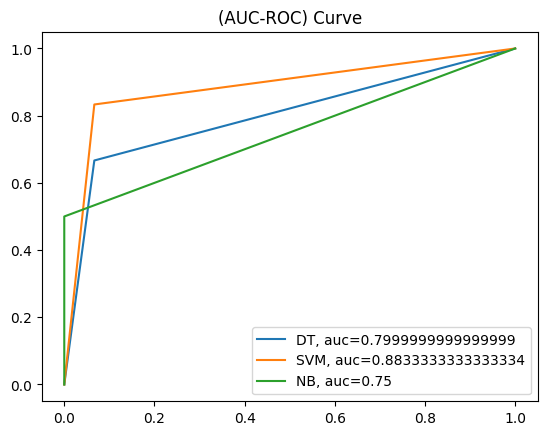

In [28]:
plt.plot(FPRRDT,TPRRDT,label="DT, auc="+str(aucDT))
plt.plot(FPRRSVM,TPRRSVM,label="SVM, auc="+str(aucSVM))
plt.plot(FPRRNB,TPRRNB,label="NB, auc="+str(aucNB))
plt.title("(AUC-ROC) Curve")
plt.legend(loc=4)
plt.show()